# Synthetic data test: Proof of concept

The main goal of this synthetic is to show that the method works under ideal circumstances. It will show how the solution converges.

In [1]:
import numpy as np
import harmonica as hm
import verde as vd
import matplotlib.pyplot as plt

## Create a model and data

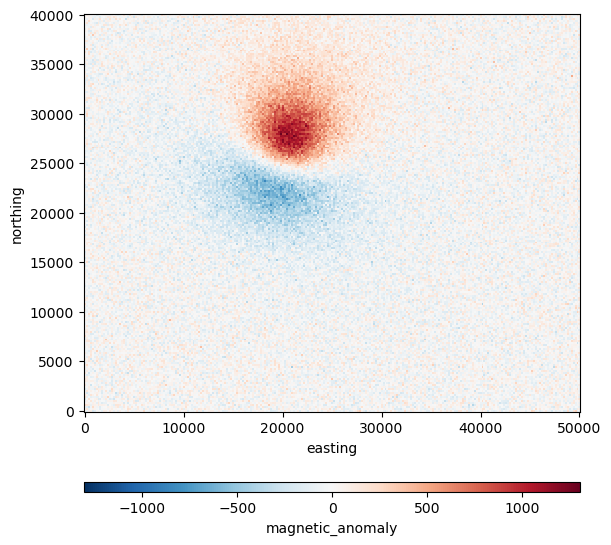

In [22]:
region = [0, 50e3, 0, 40e3]
coordinates = vd.grid_coordinates(region, spacing=200, extra_coords=800)
inclination, declination = -40, 15
magnetic_field = hm.dipole_magnetic(
    coordinates, 
    dipoles=(20e3, 25e3, -5e3),
    magnetic_moments=hm.magnetic_angles_to_vec(2e12, inclination, declination),
    field="b",
)
main_field = hm.magnetic_angles_to_vec(1, inclination, declination)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field))
magnetic_anomaly += np.random.default_rng(42).normal(0, 100, size=magnetic_anomaly.shape)

data = vd.make_xarray_grid(coordinates, magnetic_anomaly, data_names="magnetic_anomaly", extra_coords_names="height")

fig, ax = plt.subplots(1, 1, figsize=(6, 6), layout='constrained')
data.magnetic_anomaly.plot.pcolormesh(ax=ax, cbar_kwargs=dict(orientation="horizontal", aspect=50))
ax.set_aspect("equal")
plt.show()

In [19]:
data

<xarray.Dataset> Size: 811kB
Dimensions:           (northing: 201, easting: 251)
Coordinates:
  * easting           (easting) float64 2kB 0.0 200.0 400.0 ... 4.98e+04 5e+04
  * northing          (northing) float64 2kB 0.0 200.0 400.0 ... 3.98e+04 4e+04
    height            (northing, easting) float64 404kB 800.0 800.0 ... 800.0
Data variables:
    magnetic_anomaly  (northing, easting) float64 404kB 30.44 -104.0 ... 106.5